In [3]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('/Users/JooAnLee/mid_project/src/datasets/train250317-03_topic_merged.csv')
data.head()

,공고번호,주택명,공급지역코드,공급규모,투기과열지구,조정대상지역,분양가상한제,정비사업,공공주택지구,대규모택지개발지구,...,전용면적당 시세차익,기사 번호,토픽 1,토픽 2,토픽 3,토픽 4,토픽 5,토픽 6,토픽 7,주요 토픽
0,2025000043,부천 JY 포에시아,410,55,N,N,N,N,N,N,...,NaN,1,0.002633,0.0026,0.0026,0.002633,0.361367,0.081,0.547233,토픽 7
1,2025000043,부천 JY 포에시아,410,55,N,N,N,N,N,N,...,NaN,1,0.002633,0.0026,0.0026,0.002633,0.361367,0.081,0.547233,토픽 7
2,2025000043,부천 JY 포에시아,410,55,N,N,N,N,N,N,...,NaN,1,0.002633,0.0026,0.0026,0.002633,0.361367,0.081,0.547233,토픽 7
3,2025000043,부천 JY 포에시아,410,55,N,N,N,N,N,N,...,NaN,1,0.002633,0.0026,0.0026,0.002633,0.361367,0.081,0.547233,토픽 7
4,2025000043,부천 JY 포에시아,410,55,N,N,N,N,N,N,...,NaN,1,0.002633,0.0026,0.0026,0.002633,0.361367,0.081,0.547233,토픽 7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17250 entries, 0 to 17249
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공고번호          17250 non-null  int64  
 1   주택명           17250 non-null  object 
 2   공급지역코드        17250 non-null  int64  
 3   공급규모          17250 non-null  int64  
 4   투기과열지구        17250 non-null  object 
 5   조정대상지역        17250 non-null  object 
 6   분양가상한제        17250 non-null  object 
 7   정비사업          17250 non-null  object 
 8   공공주택지구        17250 non-null  object 
 9   대규모택지개발지구     17250 non-null  object 
 10  수도권내민영공공주택지구  17250 non-null  object 
 11  공급세대수         17250 non-null  int64  
 12  순위            17250 non-null  object 
 13  거주지역          17250 non-null  object 
 14  접수건수          17250 non-null  int64  
 15  경쟁률           17250 non-null  float64
 16  최저당첨가점        17250 non-null  float64
 17  전용면적          17250 non-null  float64
 18  미달여부          17250 non-nu

## target 변수 scaling
- minmaxscaler: 0과 1사이 값으로 바꿔준다.

In [6]:
# '최저당첨가점' 컬럼의 고유값 확인
unique_values = data['최저당첨가점'].unique()
print(unique_values)

[ 0. 34. 24. 33. 69. 27. 53. 39. 48. 35. 37. 52. 60. 44. 50. 32. 51. 47.
 19. 55. 59. 64. 54. 46. 57. 28. 45. 30. 31. 56. 61. 70. 72. 63. 40. 66.
 58. 67. 68. 74. 49. 38. 84. 41. 36. 22. 14. 29. 42. 43. 25. 73. 71. 65.
 62. 20. 26. 77. 75. 79. 23. 76. 21. 11. 18. 13. 15. 12. 17. 16. 10. 78.]


In [8]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 초기화
scaler = MinMaxScaler()

# '최저당첨가점' 컬럼 스케일링 후 새로운 컬럼으로 추가
data['최저당첨가점_scaled'] = scaler.fit_transform(data[['최저당첨가점']]).flatten()

# 스케일링된 데이터 확인
print(data[['최저당첨가점', '최저당첨가점_scaled']].tail(20))

       최저당첨가점  최저당첨가점_scaled
17230     0.0       0.000000
17231     0.0       0.000000
17232    58.0       0.690476
17233     0.0       0.000000
17234    62.0       0.738095
17235     0.0       0.000000
17236    59.0       0.702381
17237     0.0       0.000000
17238    58.0       0.690476
17239     0.0       0.000000
17240    61.0       0.726190
17241     0.0       0.000000
17242    59.0       0.702381
17243     0.0       0.000000
17244    63.0       0.750000
17245     0.0       0.000000
17246    66.0       0.785714
17247     0.0       0.000000
17248    63.0       0.750000
17249     0.0       0.000000


## 상관관계 분석
- 피어슨 상관관계
- 히트맵, 산점도, 회귀선이 있는 산점도

### 피어슨 상관관계

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

               최저당첨가점_scaled      토픽 1      토픽 2      토픽 3      토픽 4  \
최저당첨가점_scaled       1.000000  0.018713  0.120717 -0.064959  0.159027   
토픽 1                0.018713  1.000000  0.035803 -0.147272 -0.044390   
토픽 2                0.120717  0.035803  1.000000 -0.155216  0.024581   
토픽 3               -0.064959 -0.147272 -0.155216  1.000000 -0.216900   
토픽 4                0.159027 -0.044390  0.024581 -0.216900  1.000000   
토픽 5               -0.060537  0.069191 -0.101529 -0.217857 -0.088045   
토픽 6               -0.087921 -0.286708 -0.242138  0.037016 -0.300750   
토픽 7               -0.042423 -0.187761 -0.350637 -0.208916 -0.258386   

                   토픽 5      토픽 6      토픽 7  
최저당첨가점_scaled -0.060537 -0.087921 -0.042423  
토픽 1           0.069191 -0.286708 -0.187761  
토픽 2          -0.101529 -0.242138 -0.350637  
토픽 3          -0.217857  0.037016 -0.208916  
토픽 4          -0.088045 -0.300750 -0.258386  
토픽 5           1.000000 -0.345747 -0.252169  
토픽 6          -0.345747  1.00

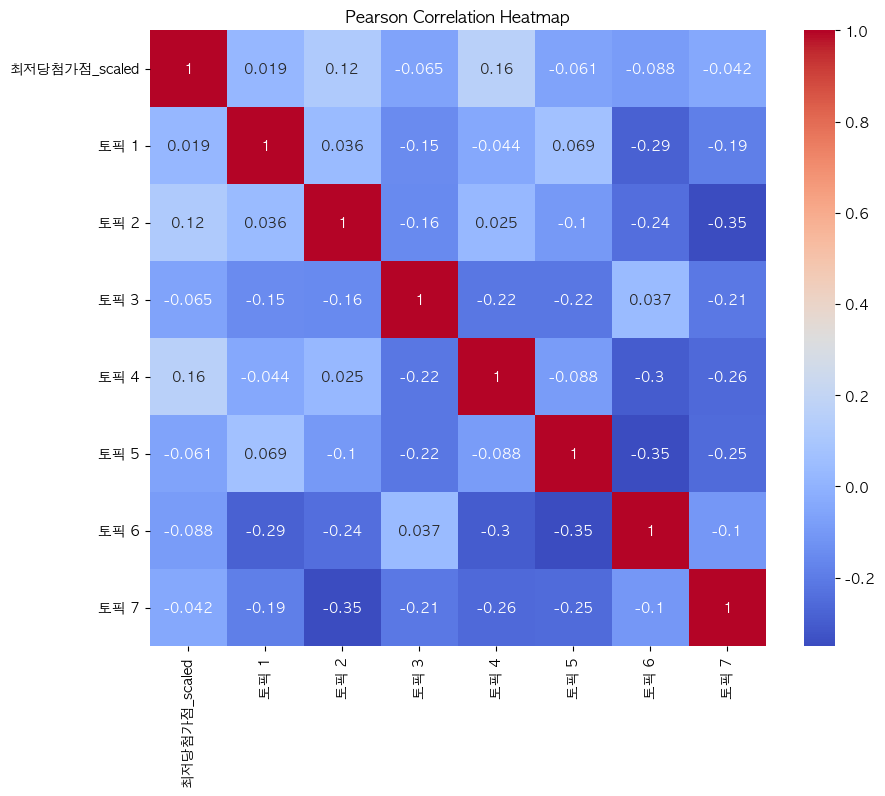

In [14]:
import numpy as np

# 피어슨 상관관계 계산
pearson_corr = data[['최저당첨가점_scaled', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7']].corr(method='pearson')

# 상관관계 행렬 출력
print(pearson_corr)

# 히트맵으로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [30]:
# 각 컬럼 간의 피어슨 상관관계와 p-value 계산
results = {}
columns = ['최저당첨가점_scaled', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7']
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        corr, p_value = pearsonr(data[columns[i]], data[columns[j]])
        results[(columns[i], columns[j])] = {'correlation': corr, 'p_value': p_value}

# 결과 출력
for key, value in results.items():
    print(f"Columns: {key}")
    print(f"Pearson Correlation: {value['correlation']}")
    print(f"P-value: {value['p_value']}")
    if value['p_value'] < 0.05:
        print("The correlation is statistically significant.")
    else:
        print("The correlation is not statistically significant.")
    print()

NameError: name 'pearsonr' is not defined

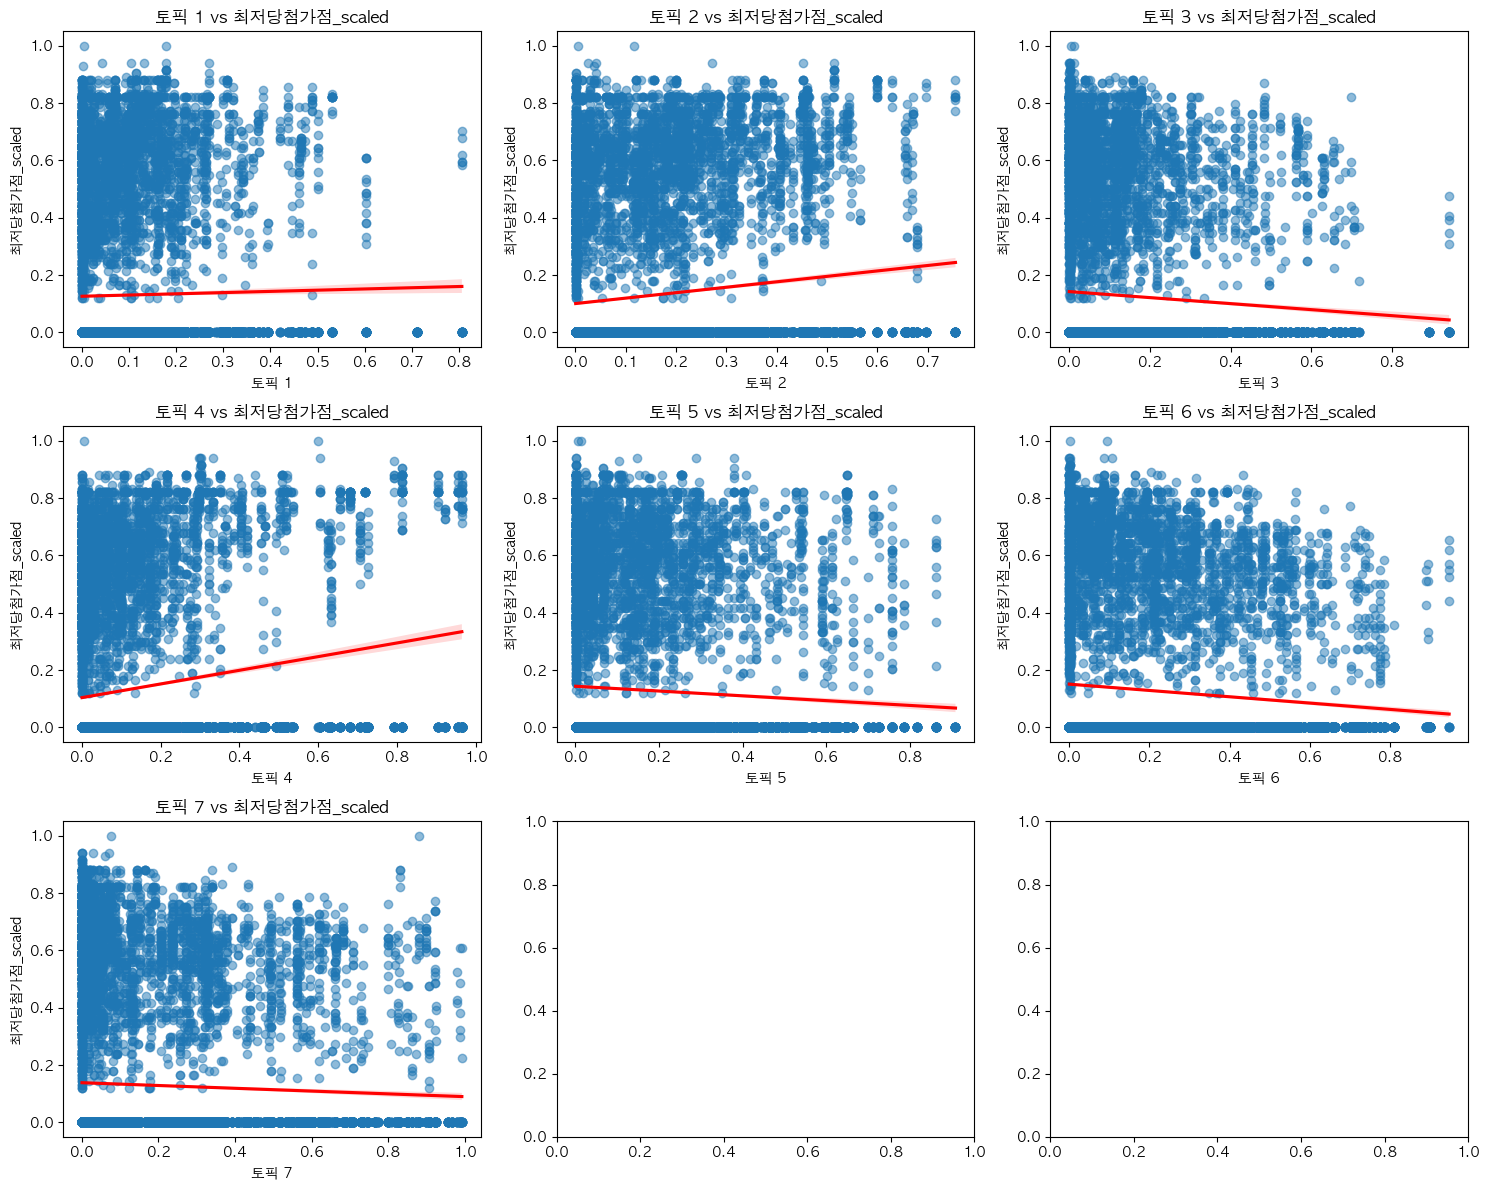

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 3x3 서브플롯 생성
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# 토픽 컬럼과 '최저당첨가점_scaled' 컬럼 간의 관계 시각화
topics = ['토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7']
for i, topic in enumerate(topics):
    row = i // 3
    col = i % 3
    sns.regplot(x=topic, y='최저당첨가점_scaled', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axs[row, col])
    axs[row, col].set_title(f'{topic} vs 최저당첨가점_scaled')
    axs[row, col].set_xlabel(topic)
    axs[row, col].set_ylabel('최저당첨가점_scaled')

# 레이아웃 조정
plt.tight_layout()

plt.show()

### 선형회귀분석
- 선형회귀모델로 분석하고 시각화, MSE, R2score로 성능 평가

MSE: 0.06412906453448383, R2 Score: 0.029209685212800984
Coefficients:
토픽 1: 69.15391097534213
토픽 2: 69.2860901775965
토픽 3: 69.08576784044664
토픽 4: 69.34573966314608
토픽 5: 69.03935351326787
토픽 6: 69.08486774552006
토픽 7: 69.14099932868153
Intercept: -69.0238956741012


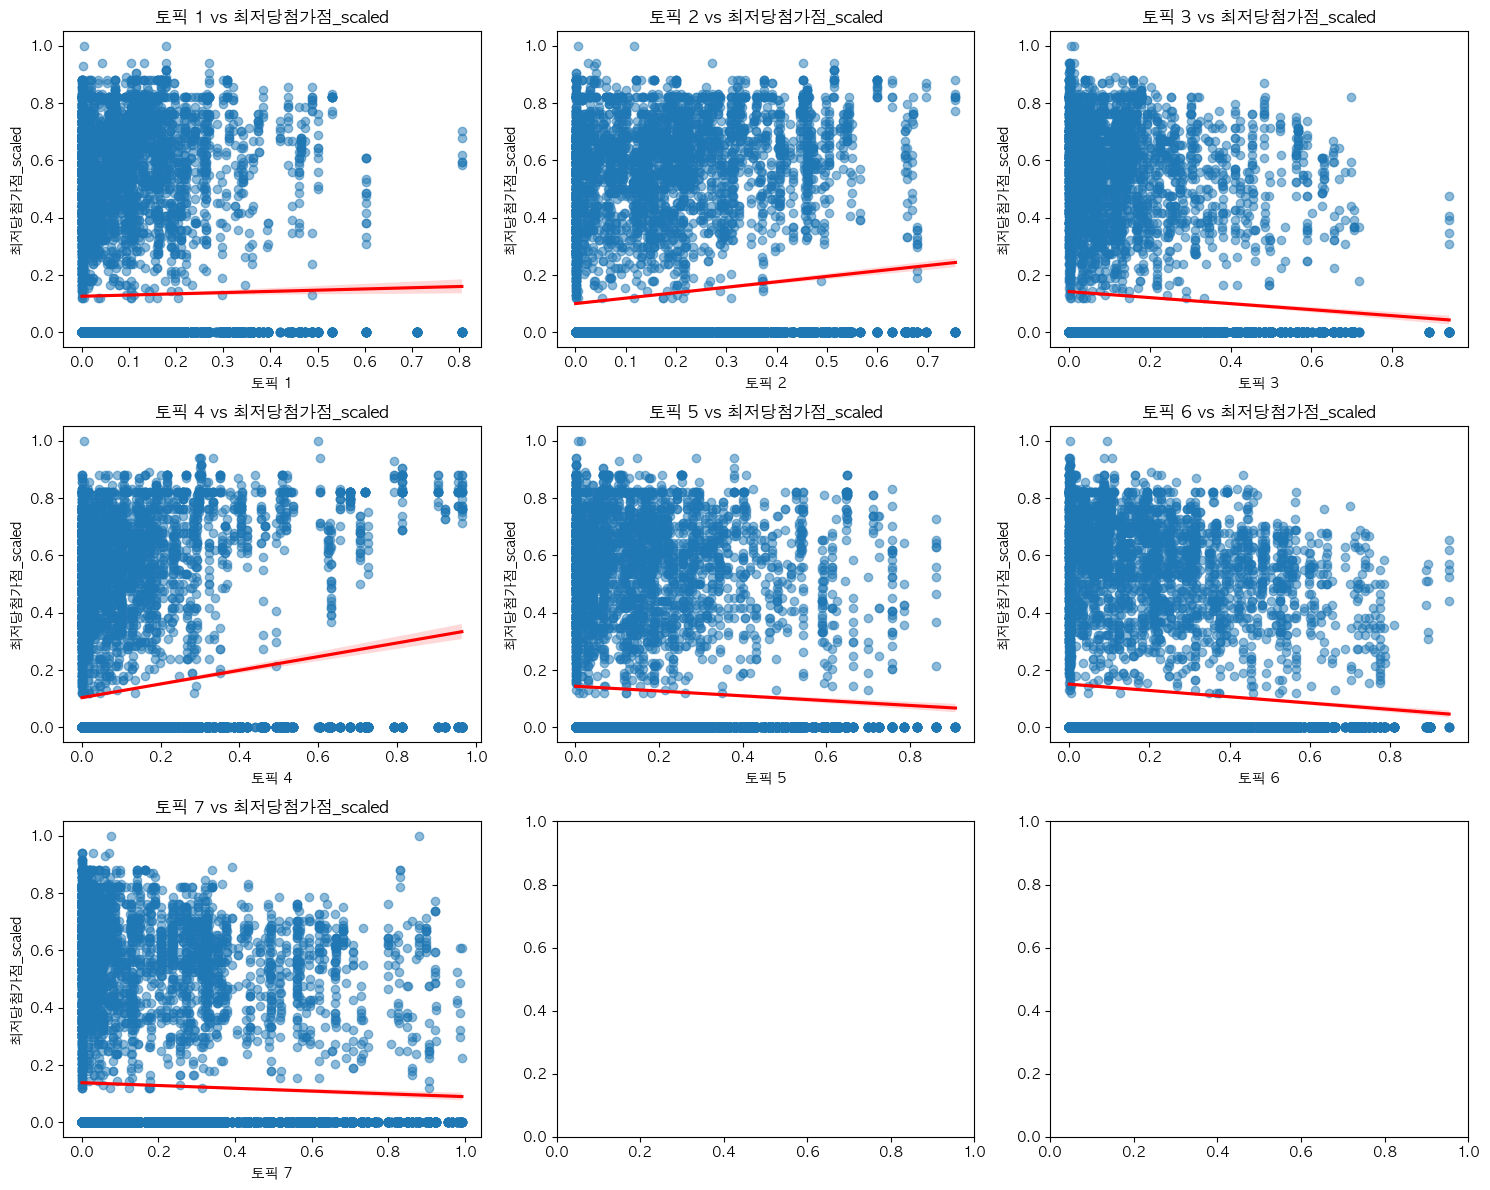

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 독립변수와 종속변수 설정
X = data[['토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7']]
y = data['최저당첨가점_scaled']

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R2 Score: {r2}")

# 회귀 계수 출력
print("Coefficients:")
for i, col in enumerate(X.columns):
    print(f"{col}: {model.coef_[i]}")
print(f"Intercept: {model.intercept_}")

# 산점도와 회귀선 시각화 (3x3 서브플롯)
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
topics = X.columns
for i, topic in enumerate(topics):
    row = i // 3
    col = i % 3
    sns.regplot(x=topic, y='최저당첨가점_scaled', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axs[row, col])
    axs[row, col].set_title(f'{topic} vs 최저당첨가점_scaled')
    axs[row, col].set_xlabel(topic)
    axs[row, col].set_ylabel('최저당첨가점_scaled')

# 레이아웃 조정
plt.tight_layout()

plt.show()

In [28]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 26.2 MB/s eta 0:00:00a 0:00:01


In [29]:
import statsmodels.api as sm
# 상수항 추가
X = sm.add_constant(X)

# 선형회귀 모델 생성 및 훈련
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          최저당첨가점_scaled   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     109.9
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          3.43e-158
Time:                        22:01:12   Log-Likelihood:                -692.33
No. Observations:               17250   AIC:                             1401.
Df Residuals:                   17242   BIC:                             1463.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -78.7918     27.416     -2.874      0.0

- 모델 성능: MSE는 비교적 낮지만, R2 Score가 매우 낮습니다. 이는 모델이 종속변수를 잘 설명하지 못하고 있음을 의미합니다.
- 회귀 계수: 계수가 매우 크고 거의 동일한 값을 가집니다. 이는 모델의 스케일링 문제나 데이터의 특성 때문일 수 있습니다.
- 개선 방향:
    - 데이터 전처리: 스케일링 방법을 다시 확인하고, 필요시 다른 스케일링 방법을 시도해볼 수 있습니다.
    - 모델 선택: 선형회귀 모델이 적합하지 않을 수 있습니다. 다른 모델(예: 비선형 회귀, 트리 기반 모델 등)을 고려해볼 수 있습니다.
    - 변수 선택: 다중공선성 문제를 확인하고, 필요시 변수를 제거하거나 주성분 분석(PCA) 등을 고려해볼 수 있습니다.\
결론적으로, 모델의 성능이 낮고 회귀 계수가 비정상적으로 크므로, 모델과 데이터 전처리에 대한 추가적인 검토가 필요합니다.

### 비선형성 시각화

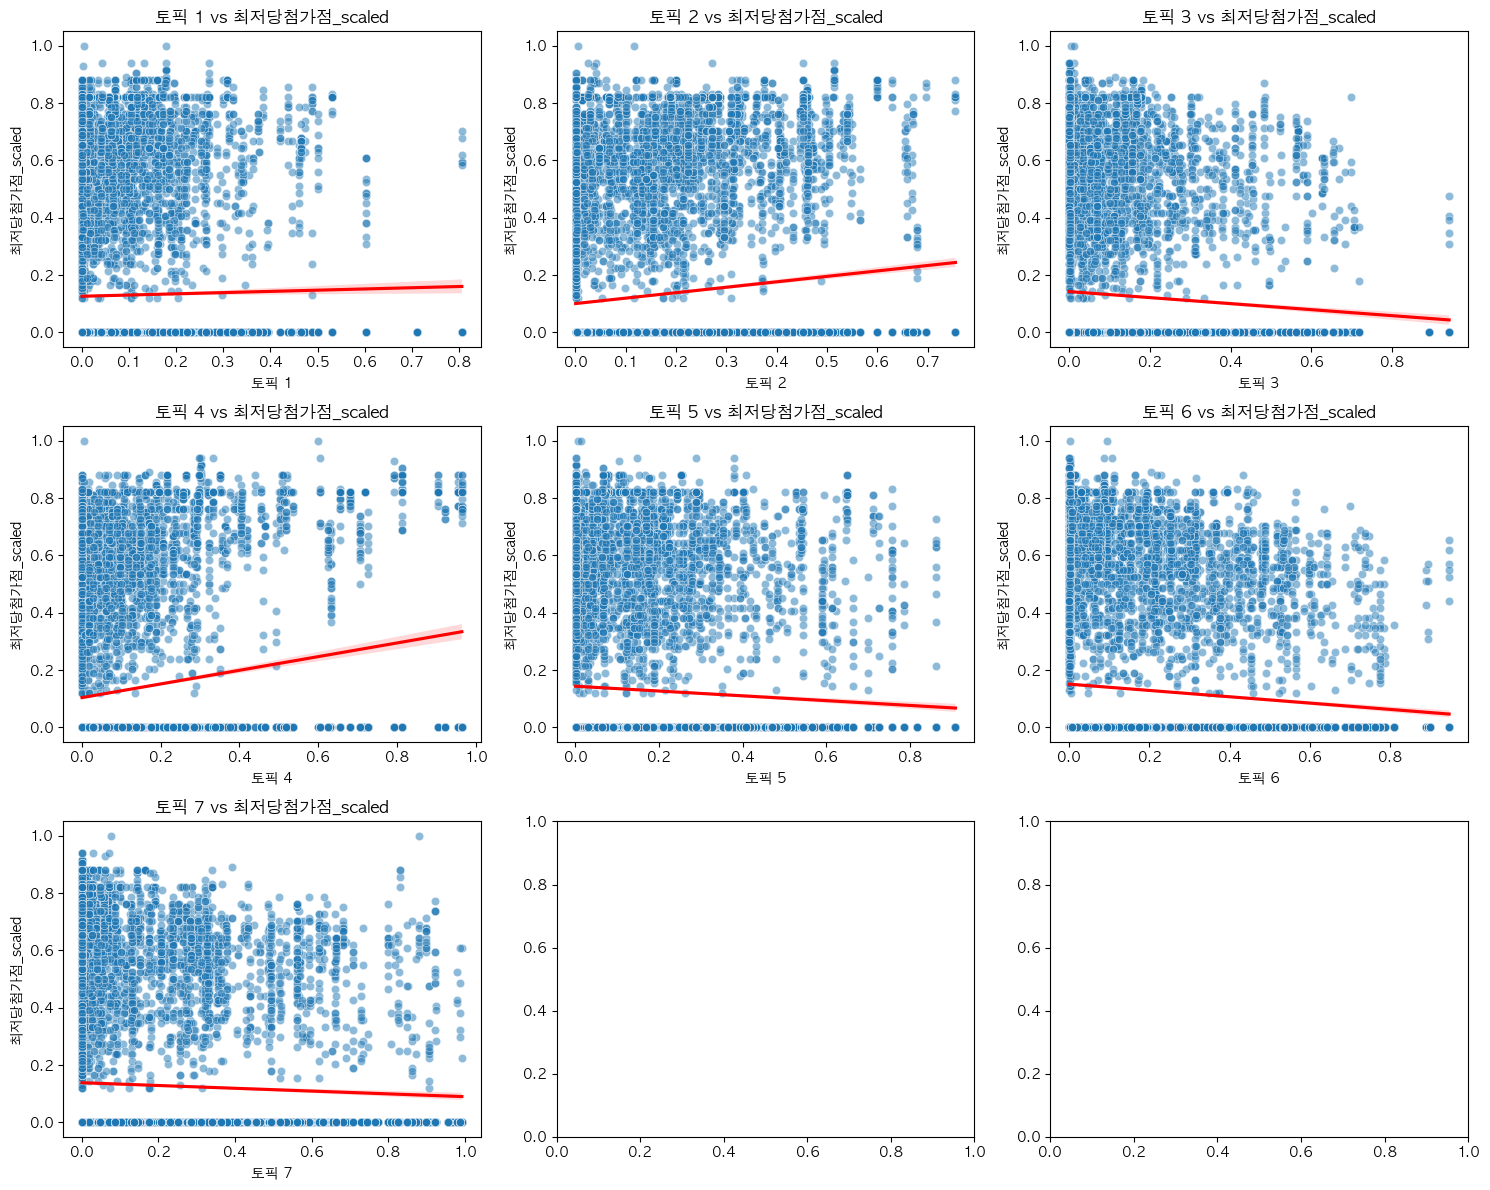

In [23]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 비선형성 시각화 (3x3 서브플롯)
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
topics = ['토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7']
for i, topic in enumerate(topics):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=topic, y='최저당첨가점_scaled', data=data, ax=axs[row, col], alpha=0.5)
    sns.regplot(x=topic, y='최저당첨가점_scaled', data=data, ax=axs[row, col], scatter=False, color='red')
    axs[row, col].set_title(f'{topic} vs 최저당첨가점_scaled')
    axs[row, col].set_xlabel(topic)
    axs[row, col].set_ylabel('최저당첨가점_scaled')

# 레이아웃 조정
plt.tight_layout()
plt.show()

## 토픽 별로 상위/하위 나눠서 경쟁률/최저당첨가점과의 관계 분석

## 최저당첨가점이 0인 행 제거 후 확인

In [32]:
# 최저당첨가점이 0이 아닌 행만 선택
filtered_data = data[(data['최저당첨가점'] != 0) & (data['경쟁률'] != 0)]

# 남은 행의 수 출력
remaining_rows = filtered_data.shape[0]
print(f"Remaining rows after excluding 최저당첨가점 = 0: {remaining_rows}")

Remaining rows after excluding 최저당첨가점 = 0: 2981


In [33]:
filtered_data

,공고번호,주택명,공급지역코드,공급규모,투기과열지구,조정대상지역,분양가상한제,정비사업,공공주택지구,대규모택지개발지구,...,기사 번호,토픽 1,토픽 2,토픽 3,토픽 4,토픽 5,토픽 6,토픽 7,주요 토픽,최저당첨가점_scaled
44,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),400,29,N,N,N,Y,N,N,...,4,0.020867,0.001167,0.001200,0.001167,0.050333,0.001200,0.924133,토픽 7,0.404762
48,2025000020,e편한세상 제물포역 파크메종(조합원 취소분),400,29,N,N,N,Y,N,N,...,4,0.020867,0.001167,0.001200,0.001167,0.050333,0.001200,0.924133,토픽 7,0.285714
60,2025000001,래미안 원페를라,100,482,Y,Y,Y,Y,N,N,...,7,0.146933,0.090867,0.001267,0.719333,0.002967,0.001267,0.037367,토픽 4,0.821429
64,2025000001,래미안 원페를라,100,482,Y,Y,Y,Y,N,N,...,7,0.146933,0.090867,0.001267,0.719333,0.002967,0.001267,0.037367,토픽 4,0.821429
68,2025000001,래미안 원페를라,100,482,Y,Y,Y,Y,N,N,...,7,0.146933,0.090867,0.001267,0.719333,0.002967,0.001267,0.037367,토픽 4,0.821429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17234,2020000298,시흥장현 영무예다음,410,747,N,N,Y,N,Y,Y,...,1951,0.062200,0.157967,0.000900,0.517567,0.168600,0.007433,0.085333,토픽 4,0.738095
17238,2020000298,시흥장현 영무예다음,410,747,N,N,Y,N,Y,Y,...,1951,0.062200,0.157967,0.000900,0.517567,0.168600,0.007433,0.085333,토픽 4,0.690476
17240,2020000298,시흥장현 영무예다음,410,747,N,N,Y,N,Y,Y,...,1951,0.062200,0.157967,0.000900,0.517567,0.168600,0.007433,0.085333,토픽 4,0.726190
17244,2020000298,시흥장현 영무예다음,410,747,N,N,Y,N,Y,Y,...,1951,0.062200,0.157967,0.000900,0.517567,0.168600,0.007433,0.085333,토픽 4,0.750000


               최저당첨가점_scaled      토픽 1      토픽 2      토픽 3      토픽 4  \
최저당첨가점_scaled       1.000000  0.137273  0.229448 -0.143454  0.380044   
토픽 1                0.137273  1.000000 -0.004301 -0.169536 -0.070363   
토픽 2                0.229448 -0.004301  1.000000 -0.119852 -0.066665   
토픽 3               -0.143454 -0.169536 -0.119852  1.000000 -0.239927   
토픽 4                0.380044 -0.070363 -0.066665 -0.239927  1.000000   
토픽 5               -0.059241  0.076151 -0.138577 -0.179347 -0.092795   
토픽 6               -0.304640 -0.255903 -0.186489  0.052022 -0.361751   
토픽 7               -0.186499 -0.177609 -0.355381 -0.157268 -0.277932   

                   토픽 5      토픽 6      토픽 7  
최저당첨가점_scaled -0.059241 -0.304640 -0.186499  
토픽 1           0.076151 -0.255903 -0.177609  
토픽 2          -0.138577 -0.186489 -0.355381  
토픽 3          -0.179347  0.052022 -0.157268  
토픽 4          -0.092795 -0.361751 -0.277932  
토픽 5           1.000000 -0.316898 -0.268836  
토픽 6          -0.316898  1.00

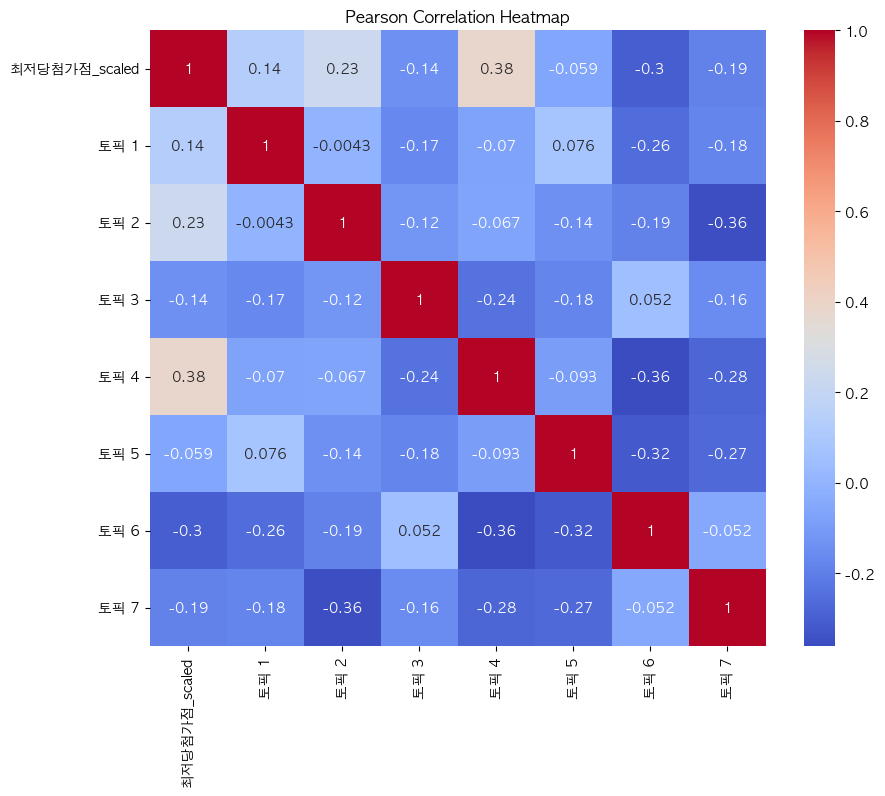

In [37]:
import numpy as np

# 피어슨 상관관계 계산
pearson_corr = filtered_data[['최저당첨가점_scaled', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7']].corr(method='pearson')

# 상관관계 행렬 출력
print(pearson_corr)

# 히트맵으로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

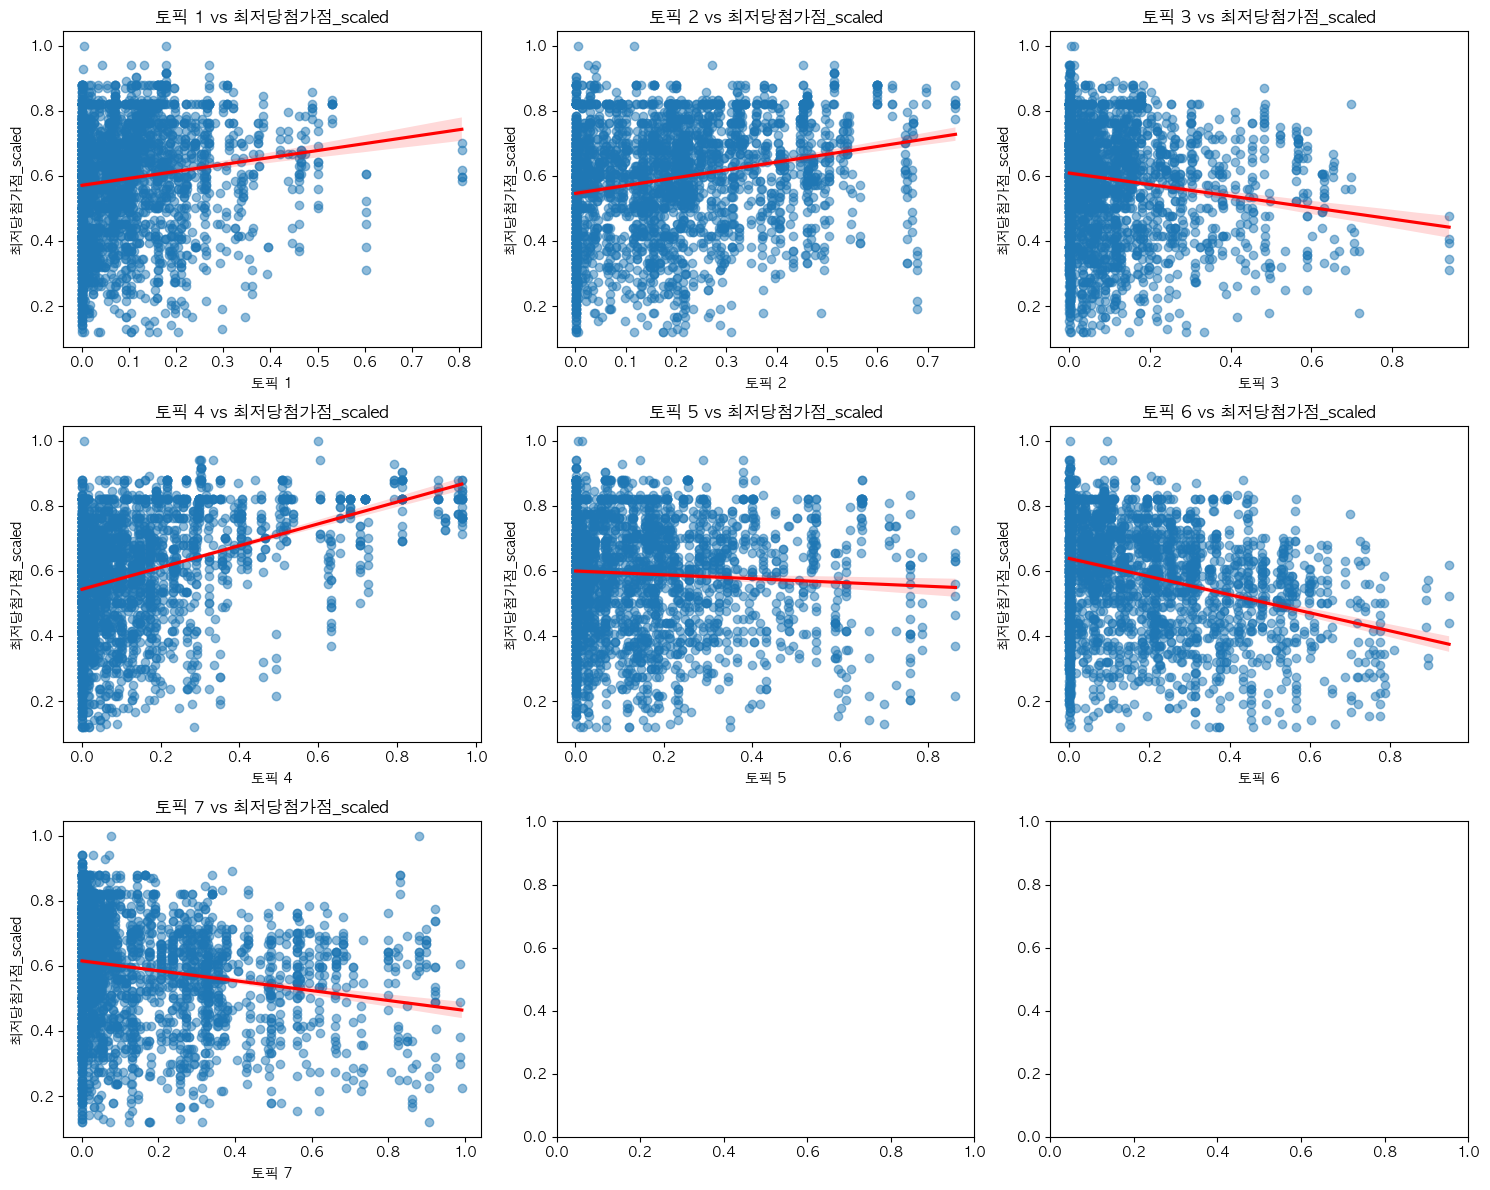

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 3x3 서브플롯 생성
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# 토픽 컬럼과 '최저당첨가점_scaled' 컬럼 간의 관계 시각화
topics = ['토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7']
for i, topic in enumerate(topics):
    row = i // 3
    col = i % 3
    sns.regplot(x=topic, y='최저당첨가점_scaled', data=filtered_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axs[row, col])
    axs[row, col].set_title(f'{topic} vs 최저당첨가점_scaled')
    axs[row, col].set_xlabel(topic)
    axs[row, col].set_ylabel('최저당첨가점_scaled')

# 레이아웃 조정
plt.tight_layout()

plt.show()

           경쟁률      토픽 1      토픽 2      토픽 3      토픽 4      토픽 5      토픽 6  \
경쟁률   1.000000  0.043182  0.018788 -0.045388  0.131857 -0.024071 -0.071286   
토픽 1  0.043182  1.000000 -0.004301 -0.169536 -0.070363  0.076151 -0.255903   
토픽 2  0.018788 -0.004301  1.000000 -0.119852 -0.066665 -0.138577 -0.186489   
토픽 3 -0.045388 -0.169536 -0.119852  1.000000 -0.239927 -0.179347  0.052022   
토픽 4  0.131857 -0.070363 -0.066665 -0.239927  1.000000 -0.092795 -0.361751   
토픽 5 -0.024071  0.076151 -0.138577 -0.179347 -0.092795  1.000000 -0.316898   
토픽 6 -0.071286 -0.255903 -0.186489  0.052022 -0.361751 -0.316898  1.000000   
토픽 7 -0.045709 -0.177609 -0.355381 -0.157268 -0.277932 -0.268836 -0.052004   

          토픽 7  
경쟁률  -0.045709  
토픽 1 -0.177609  
토픽 2 -0.355381  
토픽 3 -0.157268  
토픽 4 -0.277932  
토픽 5 -0.268836  
토픽 6 -0.052004  
토픽 7  1.000000  


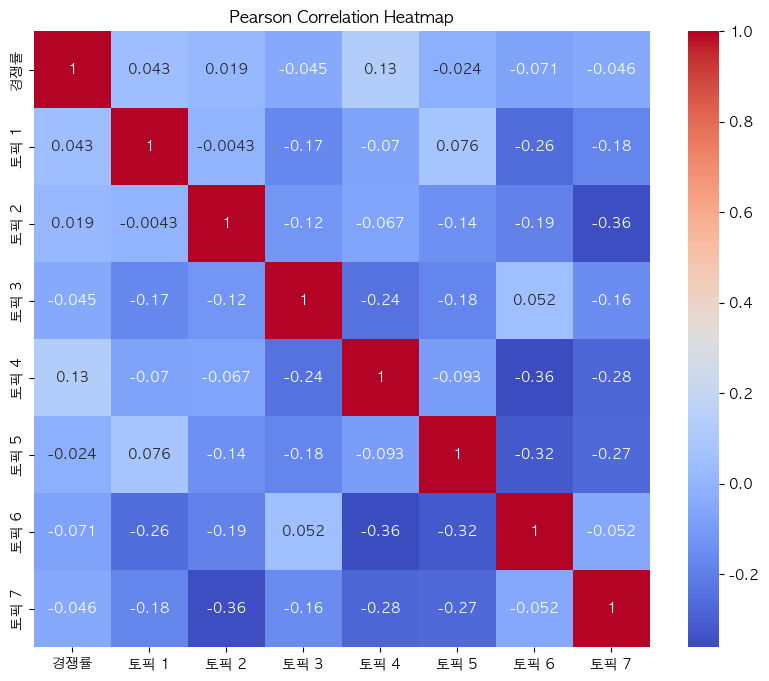

In [38]:
import numpy as np

# 피어슨 상관관계 계산
pearson_corr = filtered_data[['경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7']].corr(method='pearson')

# 상관관계 행렬 출력
print(pearson_corr)

# 히트맵으로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Pearson Correlation Heatmap')
plt.show()